<a href="https://colab.research.google.com/github/hukitoc94/DLS/blob/master/Hukitoc_simpsons_Vol3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Если честно в исходном ноутбуке "каша" с установкой библиотек, поэтому я хочу переписать все с нуля и комментировать код уже тут 

In [ ]:
import PIL
PIL.__version__

'5.3.0'

In [ ]:
# устанавливаем пил 5.3.0 и перезапускаем ноут бук
!pip uninstall -y Pillow
!pip install -Iv Pillow==5.3.0

Found existing installation: Pillow 7.1.2
Uninstalling Pillow-7.1.2:
  Successfully uninstalled Pillow-7.1.2
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https:/

In [ ]:
!pip install -U torch torchvision
!pip install -q 'https://download.pytorch.org/whl/cu101/torch-1.5.0%2Bcu101-cp36-cp36m-linux_x86_64.whl' torchvision
import torch
!nvidia-smi
torch.cuda.is_available()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████████████████████████  | 834.1 MB 1.2 MB/s eta 0:00:48tcmalloc: large alloc 1147494400 bytes == 0x64a0a000 @  0x7f5ca25e4615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 890.2 MB 8.0 kB/s 
     |████████████████████████████████| 24.3 MB 1.3 MB/s 
     |████████████████████████████████| 317.1 MB 35 kB/s 
     |████████████████████████████████| 849 kB 66.6 MB/s 
     |████████████████████████████████| 21.0 MB 1.2 MB/s 
     |████████████████████████████████| 557.1 MB 13 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully unin

False

In [5]:
import torch
!nvidia-smi
torch.cuda.is_available()

Thu Nov 17 12:22:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

In [4]:
from google.colab import drive
drive.mount('/content/gdrive/')
!unzip -q /content/gdrive/My\ Drive/journey-springfield.zip
!ls train


Mounted at /content/gdrive/
simpsons_dataset


In [3]:
import pickle
import numpy as np
import pandas as pd
from skimage import io
import math
import random

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms, models
from torchvision.utils import save_image
from torch.optim import lr_scheduler




from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import colors, pyplot as plt
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки 
# мы будем игнорировать warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

все очень хорошо, но в начале я хочу посмотреть на данные 

In [6]:
train_dir = Path('train/simpsons_dataset')
train_val_files = sorted(list(train_dir.rglob('*.jpg')))

train_val_labels = [path.parent.name for path in train_val_files]


In [7]:
df = pd.DataFrame({"labels" : train_val_labels}).value_counts().rename_axis('unique_values').to_frame('counts')
df = df.reset_index().set_index('unique_values')

In [8]:
df

,counts
unique_values,
homer_simpson,2246
ned_flanders,1454
moe_szyslak,1452
lisa_simpson,1354
bart_simpson,1342
marge_simpson,1291
krusty_the_clown,1206
principal_skinner,1194
charles_montgomery_burns,1193


довольно очевиден дисбаланс гомеров 2200 а лионеля хатца 3, поскольку колаб имеет какие то ограничения по объему данных,аугаментациями остальные классы до 2250 (способ я посмотрел в одном из ноутбуков на кагле, но это правилами не запрещено)

Идея с 2250 была очень плохой, очень громоздкий датасет , 10 эпох на алекснет у меня грузились полтора часа, 40 эпох не загрузились совсем, поэтому у меня две идеи
1)увеличить там где мало картинок до 1000, да дисбаланс будет, но если качество модели будет не очень хорошее я попробую выкинуть часть данных

In [10]:
df['to_add'] = df['counts'].apply(lambda x: 1500 - x if x < 1500 else 0)
df['one_iteration'] = df.apply(lambda x: math.ceil(x['to_add'] / x['counts']), axis=1)
df
# to_add - сколько добавить до 2250 , one_iteration - сколько раз пройтись циклом по данным

,counts,to_add,one_iteration
unique_values,,,
homer_simpson,2246,0,0
ned_flanders,1454,46,1
moe_szyslak,1452,48,1
lisa_simpson,1354,146,1
bart_simpson,1342,158,1
marge_simpson,1291,209,1
krusty_the_clown,1206,294,1
principal_skinner,1194,306,1
charles_montgomery_burns,1193,307,1


In [11]:
augmenters = {
    'Crop': transforms.Compose([
                                transforms.Resize(size=300, max_size=301),
                                transforms.CenterCrop(size=300),
                                transforms.RandomCrop(250)
                                ]),
    'Rotate': transforms.RandomRotation(degrees=(-45, 45)),
    'HFlip': transforms.RandomHorizontalFlip(p=1)
}

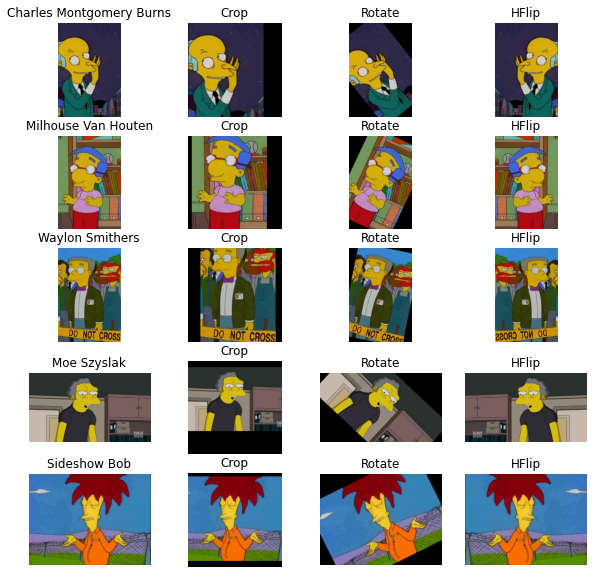

In [12]:
n_examples = 5

fig, ax = plt.subplots(nrows=n_examples, ncols=(len(augmenters) + 1),figsize=(10, 10))

for i in range(n_examples):
    random_character = int(np.random.uniform(0, len(train_val_files)))
    img_path = train_val_files[random_character]


    img_orig = Image.open(img_path)
    img_orig.load()

    img_label = train_val_files[random_character].parent.name

    img_label = " ".join(map(lambda x: x.capitalize(),\
                img_label.split('_')))
    ax[i][0].imshow(img_orig)
    ax[i][0].set_title(img_label)
    ax[i][0].axis('off')
        
    for j, (augmenter_name, augmenter) in enumerate(augmenters.items()):
        img_aug = augmenter(img_orig)
        ax[i][j + 1].imshow(img_aug)
        ax[i][j + 1].set_title(augmenter_name)
        ax[i][j + 1].axis('off')


Далее циклы для того чтобы пробегаться и увеличивать выборку 



In [13]:

for image_path in tqdm(train_val_files):
    path = image_path.parents[0]
    character = image_path.parent.name


    img = Image.open(image_path)
    img.load()
    # if we don't need to add any images, we can continue without transformation
    if df.loc[character]['to_add'] <= 0:
        continue
    if df.loc[character]['one_iteration'] > df.loc[character]['to_add']:
        iter_size = df.loc[character]['to_add']
    else:
        iter_size = df.loc[character]['one_iteration']
    df.loc[character]['to_add'] -= iter_size
    for i in range(iter_size):
        augmenter = random.choice(list(augmenters.values()))
        aug_img = augmenter(img)
        aug_img.save(f"{path}/{image_path.name.split('.')[0]}_{i}.jpg")

100%|██████████| 20933/20933 [04:27<00:00, 78.34it/s]


In [14]:
train_dir = Path('train/simpsons_dataset')
train_val_files = sorted(list(train_dir.rglob('*.jpg')))

train_val_labels = [path.parent.name for path in train_val_files]

df = pd.DataFrame({"labels" : train_val_labels}).value_counts().rename_axis('unique_values').to_frame('counts')
df = df.reset_index().set_index('unique_values')

df

,counts
unique_values,
homer_simpson,2246
abraham_grampa_simpson,1500
patty_bouvier,1500
mayor_quimby,1500
milhouse_van_houten,1500
miss_hoover,1500
moe_szyslak,1500
ned_flanders,1500
nelson_muntz,1500


теперь можно исполнить все то что мы исполняли в учебном ноутбуке 

In [15]:
# разные режимы датасета 
DATA_MODES = ['train', 'val', 'test']
# все изображения будут масштабированы к размеру 224x224 px
RESCALE_SIZE = 224
# работаем на видеокарте
DEVICE = torch.device("cuda")

In [16]:
class SimpsonsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [17]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [18]:
TRAIN_DIR = Path('train/simpsons_dataset')
TEST_DIR = Path('testset/testset')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

In [19]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

In [20]:
val_dataset = SimpsonsDataset(val_files, mode='val')

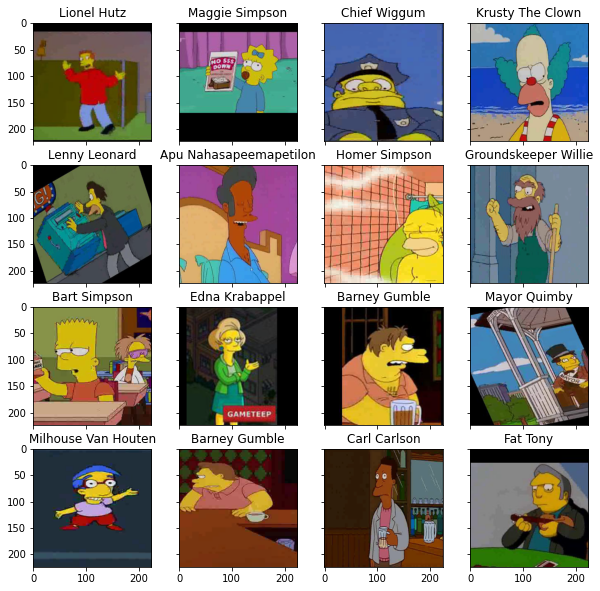

In [21]:
fig, ax = plt.subplots(nrows=4, ncols=4,figsize=(10, 10), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,10000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

хочу попробовать алекснет

In [22]:
AlexNet = models.alexnet(pretrained=True)



/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [23]:
for param in AlexNet.parameters():
    param.requires_grad = False

AlexNet.classifier[6] = nn.Linear(4096,42) # поменять последний слой 

print(AlexNet)


#features_num = 9216
#num_classes = 42 

#AlexNet.classifier = nn.Linear(9216,42)
AlexNet = AlexNet.to(DEVICE)

#print(AlexNet)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [24]:
def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc


In [25]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.cpu().numpy() / processed_size
    return val_loss, val_acc

In [30]:
def train(train_files, val_files, model, epochs, batch_size):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(model.parameters())
        criterion = nn.CrossEntropyLoss()
        scheduler = lr_scheduler.StepLR(opt, step_size=7, gamma=0.1, verbose = True)
        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            scheduler.step()
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [27]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [28]:
if val_dataset is None:
    val_dataset = SimpsonsDataset(val_files, mode='val')
    
train_dataset = SimpsonsDataset(train_files, mode='train')

In [29]:
history = train(train_dataset, val_dataset, model=AlexNet, epochs=10, batch_size=1024)

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
loss 1.8962387555005942


epoch:  10%|█         | 1/10 [09:52<1:28:54, 592.70s/it]

Adjusting learning rate of group 0 to 1.0000e-03.

Epoch 001 train_loss: 1.8962     val_loss 1.0959 train_acc 0.5127 val_acc 0.7336
loss 0.8562911996685042


epoch:  20%|██        | 2/10 [19:37<1:18:24, 588.11s/it]

Adjusting learning rate of group 0 to 1.0000e-03.

Epoch 002 train_loss: 0.8563     val_loss 0.7970 train_acc 0.7971 val_acc 0.8066
loss 0.618201789620775


epoch:  30%|███       | 3/10 [29:11<1:07:50, 581.48s/it]

Adjusting learning rate of group 0 to 1.0000e-03.

Epoch 003 train_loss: 0.6182     val_loss 0.6638 train_acc 0.8561 val_acc 0.8384
loss 0.4901469086858408


epoch:  40%|████      | 4/10 [37:32<54:58, 549.82s/it]

Adjusting learning rate of group 0 to 1.0000e-03.

Epoch 004 train_loss: 0.4901     val_loss 0.5860 train_acc 0.8881 val_acc 0.8551
loss 0.4043923611771487


epoch:  50%|█████     | 5/10 [45:07<42:58, 515.60s/it]

Adjusting learning rate of group 0 to 1.0000e-03.

Epoch 005 train_loss: 0.4044     val_loss 0.5329 train_acc 0.9110 val_acc 0.8688
loss 0.34369427319035184


epoch:  60%|██████    | 6/10 [52:38<32:54, 493.73s/it]

Adjusting learning rate of group 0 to 1.0000e-03.

Epoch 006 train_loss: 0.3437     val_loss 0.5000 train_acc 0.9271 val_acc 0.8737
loss 0.2992173424925845


epoch:  70%|███████   | 7/10 [59:46<23:36, 472.32s/it]

Adjusting learning rate of group 0 to 1.0000e-03.

Epoch 007 train_loss: 0.2992     val_loss 0.4683 train_acc 0.9392 val_acc 0.8827
loss 0.26281265297903794


epoch:  80%|████████  | 8/10 [1:06:53<15:15, 457.85s/it]

Adjusting learning rate of group 0 to 1.0000e-03.

Epoch 008 train_loss: 0.2628     val_loss 0.4463 train_acc 0.9484 val_acc 0.8881
loss 0.23351179380580342


epoch:  90%|█████████ | 9/10 [1:14:01<07:28, 448.33s/it]

Adjusting learning rate of group 0 to 1.0000e-03.

Epoch 009 train_loss: 0.2335     val_loss 0.4338 train_acc 0.9562 val_acc 0.8906
loss 0.21137354756439386


epoch: 100%|██████████| 10/10 [1:21:05<00:00, 486.56s/it]

Adjusting learning rate of group 0 to 1.0000e-04.

Epoch 010 train_loss: 0.2114     val_loss 0.4198 train_acc 0.9614 val_acc 0.8914


дообучу еще 

In [ ]:
history = train(train_dataset, val_dataset, model=AlexNet, epochs=21, batch_size=1024)

epoch:   0%|          | 0/21 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
loss 0.20518499665918685


epoch:   5%|▍         | 1/21 [07:08<2:22:40, 428.05s/it]

Adjusting learning rate of group 0 to 1.0000e-03.

Epoch 001 train_loss: 0.2052     val_loss 0.4089 train_acc 0.9591 val_acc 0.8936
loss 0.16108908156770002


epoch:  10%|▉         | 2/21 [14:10<2:14:27, 424.61s/it]

Adjusting learning rate of group 0 to 1.0000e-03.

Epoch 002 train_loss: 0.1611     val_loss 0.3892 train_acc 0.9707 val_acc 0.8962
loss 0.13622224668250127


epoch:  14%|█▍        | 3/21 [21:12<2:07:02, 423.48s/it]

Adjusting learning rate of group 0 to 1.0000e-03.

Epoch 003 train_loss: 0.1362     val_loss 0.3806 train_acc 0.9777 val_acc 0.8987
loss 0.11994147402078906


epoch:  19%|█▉        | 4/21 [29:05<2:05:32, 443.09s/it]

Adjusting learning rate of group 0 to 1.0000e-03.

Epoch 004 train_loss: 0.1199     val_loss 0.3706 train_acc 0.9813 val_acc 0.9018
loss 0.1030748859563722


epoch:  24%|██▍       | 5/21 [37:03<2:01:31, 455.75s/it]

Adjusting learning rate of group 0 to 1.0000e-03.

Epoch 005 train_loss: 0.1031     val_loss 0.3665 train_acc 0.9851 val_acc 0.9023
loss 0.09246791345876816


epoch:  29%|██▊       | 6/21 [45:01<1:55:45, 463.07s/it]

Adjusting learning rate of group 0 to 1.0000e-03.

Epoch 006 train_loss: 0.0925     val_loss 0.3636 train_acc 0.9877 val_acc 0.9028
loss 0.08240746474895773


epoch:  33%|███▎      | 7/21 [52:50<1:48:31, 465.09s/it]

Adjusting learning rate of group 0 to 1.0000e-04.

Epoch 007 train_loss: 0.0824     val_loss 0.3625 train_acc 0.9904 val_acc 0.9026


In [ ]:
import numpy as np
idxs = list(map(int, np.random.uniform(0,10000, 500)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(AlexNet, imgs)


actual_labels = [val_dataset[id][1] for id in idxs]

y_pred = np.argmax(probs_ims,-1)


In [ ]:
from sklearn.metrics import f1_score
f1_score(actual_labels, y_pred, average = 'weighted')


In [ ]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))


In [ ]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=128)
probs = predict(AlexNet, test_loader)
preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]




In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission = pd.DataFrame({'Id': test_filenames, 'Expected': preds}).sort_values('Id')
submission.to_csv('submission_1.csv', index=False)


In [ ]:
submission